<div style="text-align: center; font-size: 150%; margin-bottom: 20px;">
    <h1 style="color: #9B60A1;">Market Basket Analysis</h1>
</div>

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Overview:</font></h2>

Market Basket Analysis is a data mining technique aimed at discovering the purchasing patterns of customers. In this project, we utilize the Apriori algorithm to perform Market Basket Analysis on transaction data obtained from a retailer. The dataset contains information about individual transactions, including the items purchased and the corresponding transaction details such as BillNo and Date.

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Dataset Description:</font></h2>

The dataset provided includes transactional data captured over a period of time by the retailer. Each row in the dataset represents a unique transaction, with columns indicating the BillNo, Date, and the items purchased in that transaction. The retailer aims to utilize the insights gained from this analysis to improve customer engagement, enhance the shopping experience, and identify patterns in customer behavior.

<div style="border-radius: 10px; padding: 15px; background-color: rgba(173, 216, 230, 0.5); font-size: 130%; text-align: left;">
<h2 align="left"><font color="#9B60A1">Project Workflow:</font></h2>

1. __Data Cleaning:__ We start by cleaning the transaction data, ensuring that it is formatted correctly and free from inconsistencies.
2. __Transaction Transformation:__ Next, we transform the transaction data to a suitable format for analysis. This involves splitting the 'ItemName' column into individual items and validating the transformed data to ensure accuracy.
3. __Association Rule Mining:__ Using the Apriori algorithm, we mine association rules from the transaction data. These rules reveal relationships between different items purchased together and are essential for generating insights.
4. __Visualization:__ Finally, we visualize the association rules using scatterplots to explore the relationship between support, confidence, and lift. This helps in identifying significant associations and making actionable recommendations for the retailer.

<a id="Initialization"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 1 |</span><span style='color: #9B60A;'> Initialization</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>


<a id="libraries"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 1.1 |</span><span style='color:#9B60A1;'> Importing Necessary Libraries</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>


In [1]:
# Data Handling
#===================
import pandas as pd

# Data Handling
#===================
from mlxtend.frequent_patterns import apriori, association_rules

# Visualization
#===================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Warnings
#===================
import warnings
warnings.filterwarnings('ignore')

<a id="load_dataset"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 1.2 |</span><span style='color:#9B60A1;'> Loading the Dataset</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [2]:
path = '/kaggle/input/market-basket-analysis/Assignment-1_Data.xlsx'
df_original = pd.read_excel(path)
df = df_original.copy()
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<a id="OverviewDataCleaning"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 2 |</span><span style='color: #9B60A;'> Overview and Data Cleaning</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

<a id="overview"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 2.1 |</span><span style='color:#9B60A1;'> Overview</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [4]:
print("#" * 50)
print(" " * 15, "Dataset Information")
print("#" * 50)
print("The Dataset has {} columns and {} rows.".format(df.shape[1], df.shape[0]))
print("The DataFrame has {} duplicated values and {} missing values.".format(df.duplicated().sum(), df.isnull().sum().sum()))
print(df.info())

##################################################
                Dataset Information
##################################################
The Dataset has 7 columns and 522064 rows.
The DataFrame has 5286 duplicated values and 135496 missing values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB
None


<a id="Duplicates"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 1.2 |</span><span style='color:#9B60A1;'> Data Cleaning(Handling Duplicates)</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [5]:
df.drop_duplicates(inplace=True)

<a id="Nulls"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 1.3 |</span><span style='color:#9B60A1;'> Data Wrangling(Handling Missing Values)</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [6]:
print("#" * 30)
print(" " * 5, "Null Distribution")
print("#" * 30)
null = df.isnull().sum().to_frame().rename(columns = {0:'count'})
null['%'] = (null['count'] / len(df)) * 100.
null = null.sort_values(by = '%', ascending = False)
null.style.background_gradient(cmap = 'PRGn')

##############################
      Null Distribution
##############################


,count,%
CustomerID,133967,25.923511
Itemname,1455,0.281552
BillNo,0,0.000000
Quantity,0,0.000000
Date,0,0.000000
Price,0,0.000000
Country,0,0.000000


<a id="Consistency"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 1.4 |</span><span style='color:#9B60A1;'> Data Cleaning (Ensuring Consistency)</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [7]:
df.dropna(subset=['CustomerID', 'Itemname'], inplace=True)

In [8]:
df = df.rename(columns={'Itemname': 'ItemName'})
df['ItemName'] = df['ItemName'].str.lower()
df['CustomerID'] = df['CustomerID'].astype('int')

<a id="Pre-processing"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 3 |</span><span style='color: #9B60A;'> Pre-processing</span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

<a id="Transactions"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 3.1 |</span><span style='color:#9B60A1;'> Creating Transactions DataFrame </span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [9]:
# Create transactions DF
transactions_original = df.groupby(['BillNo', 'Date'])['ItemName'].apply(lambda x: ', '.join(x)).reset_index()

transactions_original.drop(columns=['BillNo', 'Date'], inplace=True)

transactions_original.head()

,ItemName
0,"white hanging heart t-light holder, white meta..."
1,"hand warmer union jack, hand warmer red polka dot"
2,"assorted colour bird ornament, poppy's playhou..."
3,"jam making set with jars, red coat rack paris ..."
4,bath building block word


In [10]:
transactions = transactions_original.copy()
transactions.head()

,ItemName
0,"white hanging heart t-light holder, white meta..."
1,"hand warmer union jack, hand warmer red polka dot"
2,"assorted colour bird ornament, poppy's playhou..."
3,"jam making set with jars, red coat rack paris ..."
4,bath building block word


<a id="TransformTransactions"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 3.2 |</span><span style='color:#9B60A1;'> Transform Transactions </span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [27]:
def transform_and_validate_transactions(transactions_df, original_df):
    """
    Transforms the transactions dataframe where each row represents a transaction
    and each column contains items purchased in that transaction. It validates
    that the number of rows is equal to the number of unique ['BillNo', 'Date'] combinations
    in the original dataframe and the number of columns is equal to the number of unique items.
    
    :param transactions_df: The transactions DataFrame with 'ItemName' to be itemized.
    :param original_df: The original DataFrame used for validation.
    :return: Transformed and validated DataFrame where each row is a transaction and each column is an item.
    """
    # Split 'ItemName' into individual items
    items_df = transactions_df['ItemName'].str.split(', ', expand=True)
    
    # Calculate the number of unique ['BillNo', 'Date'] combinations in original_df
    unique_transactions_count = original_df.drop_duplicates(subset=['BillNo', 'Date']).shape[0]
    # Validate the number of rows
    assert items_df.shape[0] == unique_transactions_count, \
        f"Row count mismatch! Expected: {unique_transactions_count}, Got: {items_df.shape[0]}"
    
    # Calculate the number of unique items across all transactions
    all_items = set()
    original_df['ItemName'].str.split(', ').apply(lambda items: all_items.update(items if items else []))
    max_product_counts = transactions['ItemName'].str.split(', ').apply(len).max()
    # Validate the number of columns
    assert items_df.shape[1] == max_product_counts, \
        f"Column count mismatch! Expected: {max_product_counts}, Got: {items_df.shape[1]}"
    
    # Return the transformed and validated DataFrame
    return items_df

# Apply the function and validate the results
transformed_and_validated_transactions = transform_and_validate_transactions(transactions_original, df)
print(transformed_and_validated_transactions.head())



                                  0                            1    \
0  white hanging heart t-light holder          white metal lantern   
1              hand warmer union jack    hand warmer red polka dot   
2       assorted colour bird ornament    poppy's playhouse bedroom   
3            jam making set with jars  red coat rack paris fashion   
4            bath building block word                         None   

                              2                                    3    \
0  cream cupid hearts coat hanger  knitted union flag hot water bottle   
1                            None                                 None   
2       poppy's playhouse kitchen    feltcraft princess charlotte doll   
3  yellow coat rack paris fashion         blue coat rack paris fashion   
4                            None                                 None   

                              4                                   5    \
0  red woolly hottie white heart.        set 7 babushka nesti

<a id="Encoding"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#0b8549; font-size:140%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='#fcc36d;'>Step 3.3 |</span><span style='color:#9B60A1;'> Encoding </span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [28]:
# Convert items to boolean columns
df_encoded = pd.get_dummies(transformed_and_validated_transactions, prefix='', prefix_sep='').groupby(level=0, axis=1).max()

/tmp/ipykernel_782/1612355297.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_encoded = pd.get_dummies(transformed_and_validated_transactions, prefix='', prefix_sep='').groupby(level=0, axis=1).max()


<a id="AssociationRules"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 4 |</span><span style='color: #9B60A;'> Applying Association Rules </span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

In [29]:
from mlxtend.frequent_patterns import apriori, association_rules

def mine_association_rules(transactions_df, min_support=0.01, min_confidence=0.5):
    """
    This function encodes the transactions into boolean values, performs association rule mining,
    and returns the resulting rules.
    
    :param transactions_df: DataFrame with transactions where each item is represented in its own column.
    :param min_support: The minimum support for an itemset to be considered frequent.
    :param min_confidence: The minimum confidence for a rule to be considered.
    :return: DataFrame containing the association rules.
    """
    # Convert items to boolean columns
    df_encoded = pd.get_dummies(transactions_df, prefix='', prefix_sep='').groupby(level=0, axis=1).max()
    
    # Perform association rule mining
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    
    return rules

# Now, use the function and display the association rules
rules = mine_association_rules(transformed_and_validated_transactions)
print("Association Rules:")
print(rules.head())


/tmp/ipykernel_782/2097637563.py:15: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_encoded = pd.get_dummies(transactions_df, prefix='', prefix_sep='').groupby(level=0, axis=1).max()


Association Rules:
                         antecedents                        consequents  \
0            (chocolate box ribbons)           (6 ribbons rustic charm)   
1  (60 cake cases dolly girl design)  (pack of 72 retrospot cake cases)   
2      (60 teatime fairy cake cases)  (pack of 72 retrospot cake cases)   
3   (alarm clock bakelike chocolate)       (alarm clock bakelike green)   
4   (alarm clock bakelike chocolate)        (alarm clock bakelike pink)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.012368            0.039193  0.007036    0.568889  14.515044   
1            0.018525            0.054529  0.010059    0.543027   9.958409   
2            0.034631            0.054529  0.017315    0.500000   9.169355   
3            0.017150            0.042931  0.011379    0.663462  15.454151   
4            0.017150            0.032652  0.009125    0.532051  16.294742   

   leverage  conviction  zhangs_metric  
0  0.006551    2.228

<a id="SupportConfidence"></a>
<div style="background-color: rgba(173, 216, 230, 0.7); color:#9B60A1; font-size:200%; font-family:'Comic Sans MS', cursive, sans-serif; text-align:center; border-radius:20px; padding:10px; box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);">
    <span style='color:#0b8549;'>Step 5 |</span><span style='color: #9B60A;'> Visualizing Support and Confidence </span>
</div>
<a href="#contents_tabel" style="display:block; text-align:center; margin-top:10px; text-decoration:none; color:#9B60A1; font-family:'Comic Sans MS', cursive, sans-serif;">⬆️ Table of Contents</a>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

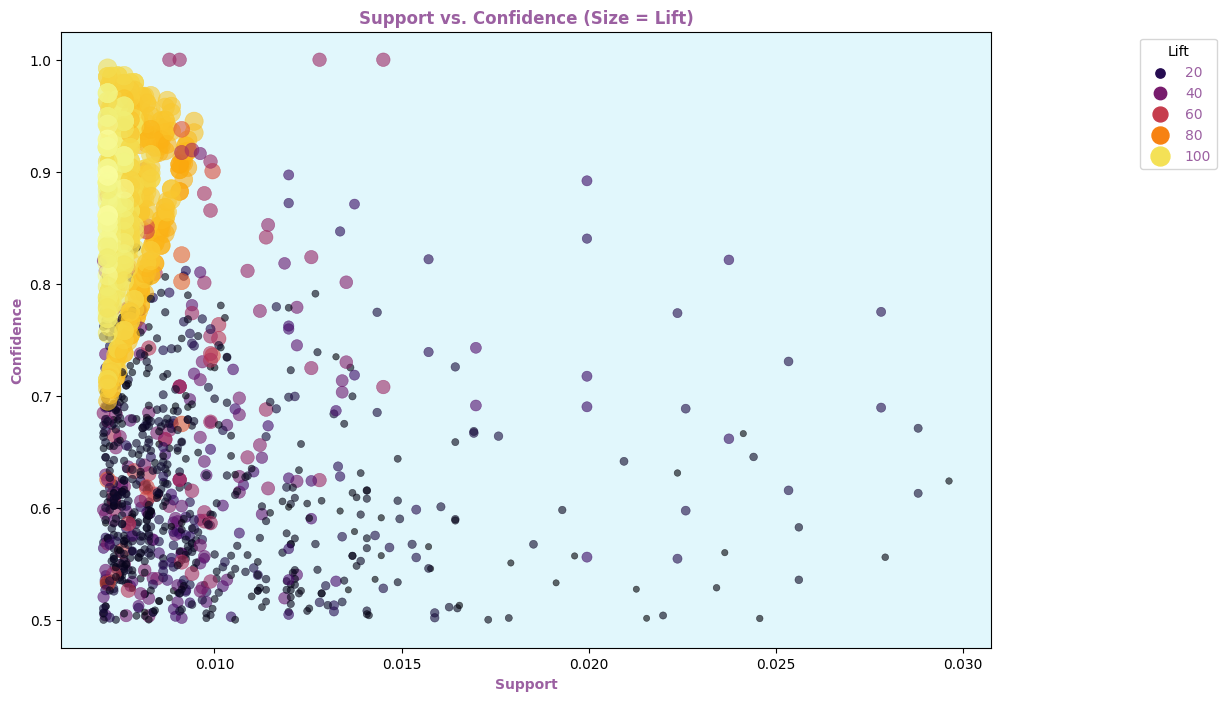

In [30]:
# Set the plot size
plt.figure(figsize=(12, 8))

# Set the background color
plt.axes().set_facecolor('#e1f7fc')  

# Plot scatterplot for Support vs. Confidence
sns.scatterplot(
    x="support",
    y="confidence",
    size="lift",
    data=rules,
    hue="lift",
    palette="inferno", # Color palette
    sizes=(20, 200),
    alpha=0.6,  # Transparency
    edgecolor=None  # Remove edge color for smoother appearance
)

# Customize the plot
plt.title('Support vs. Confidence', color='#9B60A1', fontweight='bold')  # #9B60A1 is purple
plt.xlabel('Support', color='#9B60A1', fontweight='bold')  
plt.ylabel('Confidence', color='#9B60A1', fontweight='bold')  
legend = plt.legend(title='Lift', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.setp(legend.get_texts(), color='#9B60A1')

# Show the plot
plt.show()
